# 물체 탐지(Object Detection) 
### 2021 10 20 (crop to 4 하여 데이터 증강)

In [3]:
!pip3 install tensorflow

  Using cached tensorflow-2.6.0-cp38-cp38-manylinux2010_x86_64.whl (458.4 MB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached h5py-3.1.0-cp38-cp38-manylinux1_x86_64.whl (4.4 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.1.6
    Uninstalling Keras-2.1.6:
      Successfully uninstalled Keras-2.1.6
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0


In [1]:
import tensorflow

/home/ubuntu/anaconda3/envs/cell/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/anaconda3/envs/cell/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/anaconda3/envs/cell/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/anaconda3/envs/cell/lib/python3.7/site-

In [8]:
!pip3 uninstall -y tensorflow

Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Successfully uninstalled tensorflow-2.6.0


In [10]:
!conda install tensorflow-gpu==1.13.1

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - tensorflow-gpu==1.13.1 -> python[version='2.7.*|3.6.*|3.7.*']

Your python: python=3.8

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you explicitly specify
that.

The followin

In [4]:
!pip install tensorflow==1.13.1

ERROR: Could not find a version that satisfies the requirement tensorflow==1.13.1
ERROR: No matching distribution found for tensorflow==1.13.1


In [8]:
!pip3 uninstall -y tensorflow

Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Successfully uninstalled tensorflow-2.6.0


In [28]:
!pip3 uninstall -y keras
!pip3 uninstall keras -nightly
!pip3 uninstall -y tensorflow-gpu
!pip3 uninstall tensorflow-gpu -nightly

!pip3 install keras==2.1.6
!pip3 install tensorflow-gpu==1.13.1
!pip3 install h5py==2.10.0

Found existing installation: Keras 2.1.6
Uninstalling Keras-2.1.6:
  Successfully uninstalled Keras-2.1.6

Usage:   
  pip3 uninstall [options] <package> ...
  pip3 uninstall [options] -r <requirements file> ...

no such option: -n

Usage:   
  pip3 uninstall [options] <package> ...
  pip3 uninstall [options] -r <requirements file> ...

no such option: -n
  Using cached Keras-2.1.6-py2.py3-none-any.whl (339 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires h5py~=3.1.0, but you have h5py 2.10.0 which is incompatible.
tensorflow 2.6.0 requires keras~=2.6, but you have keras 2.1.6 which is incompatible.
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==1.13.1
ERROR: No matching distribution found for tensorflow-gpu==1.13.1


In [2]:
import keras
print(keras.__version__)

2.1.6


Using TensorFlow backend.


In [45]:
!pip3 uninstall -y keras==2.6.0

In [46]:
!pip3 install keras==2.1.6

  Using cached Keras-2.1.6-py2.py3-none-any.whl (339 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires h5py~=3.1.0, but you have h5py 2.10.0 which is incompatible.
tensorflow 2.6.0 requires keras~=2.6, but you have keras 2.1.6 which is incompatible.


## Darknet 준비


In [ ]:
# 프로젝트 다운로드
%cd /content
!rm -rf darknet
!git clone https://github.com/pjreddie/darknet


/content
Cloning into 'darknet'...
remote: Enumerating objects: 5937, done.
remote: Total 5937 (delta 0), reused 0 (delta 0), pack-reused 5937
Receiving objects: 100% (5937/5937), 6.35 MiB | 24.25 MiB/s, done.
Resolving deltas: 100% (3926/3926), done.


In [ ]:
# 빌드
%cd /content/darknet
!make

# 빌드된 실행파일 확인
!ls -al darknet

# 빌드 확인
!./darknet

/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o

## 학습된 모델 파일 다운로드

In [ ]:
%cd /content/darknet
!wget wget https://pjreddie.com/media/files/yolov3.weights

/content/darknet
--2021-07-26 05:25:53--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2021-07-26 05:25:53--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  47.2MB/s    in 5.3s    

2021-07-26 05:25:59 (45.0 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

FINISHED --2021-07-26 05:25:59--
Total wall clock time: 5.6s
Downloaded: 1 files, 237M in 5.3s (45.0 MB/s)


## Keras 변환 코드 다운로드


In [31]:
# 다운로드
%cd //home/ubuntu/cell
!rm -rf keras-yolo3

!git clone https://github.com/qqwweee/keras-yolo3
  
# 다운로드된 디렉토리로 이동
%cd keras-yolo3

# 내용 확인
!pwd
!ls -al  

/home/ubuntu/cell
'keras-yolo3'에 복제합니다...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
오브젝트를 받는 중: 100% (144/144), 151.08 KiB | 894.00 KiB/s, 완료.
델타를 알아내는 중: 100% (65/65), 완료.
/home/ubuntu/cell/keras-yolo3
/home/ubuntu/cell/keras-yolo3
합계 124
drwxrwxr-x 6 ubuntu ubuntu  4096  8월 19 15:03 .
drwxrwxr-x 6 ubuntu ubuntu  4096  8월 19 15:03 ..
drwxrwxr-x 8 ubuntu ubuntu  4096  8월 19 15:03 .git
-rw-rw-r-- 1 ubuntu ubuntu  1201  8월 19 15:03 .gitignore
-rw-rw-r-- 1 ubuntu ubuntu  1064  8월 19 15:03 LICENSE
-rw-rw-r-- 1 ubuntu ubuntu  4077  8월 19 15:03 README.md
-rw-rw-r-- 1 ubuntu ubuntu  1323  8월 19 15:03 coco_annotation.py
-rw-rw-r-- 1 ubuntu ubuntu 10093  8월 19 15:03 convert.py
-rw-rw-r-- 1 ubuntu ubuntu  5707  8월 19 15:03 darknet53.cfg
drwxrwxr-x 2 ubuntu ubuntu  4096  8월 19 15:03 font
-rw-rw-r-- 1 ubuntu ubuntu  3482  8월 19 15:03 kmeans.py
drwxrwxr-x 2 ubuntu ubuntu  4096  8월 19 15:03 model_data
-rw-rw-r-- 1 ubuntu ubuntu  8332  8월

## YOLO3 모델 파일 카피


In [ ]:
%cd /content/keras-yolo3

!cp /content/darknet/yolov3.weights ./

!ls -al yolov3.weights

/content/keras-yolo3
-rw-r--r-- 1 root root 248007048 Jul 26 05:26 yolov3.weights


## 모델 파일 변환

YOLO3 자체는 C/C++로 구현된 DarkNet 프레임웤으로 구현되어 있다. 

공개된 모델은 DarkNet의 포멧이다. 이를 Keras에서 사용할 수 있는 h5 포멧으로 변환한다.


- convert.py : 변환 실행 파일

- yolov3.cfg : Darknet에서 사용하는 모델 구조 정의 파일

- yolov3.weight : Darknet으로 학습된 모델 파일


실행 결과로 다음의 h5 파일로 변환된다.
 
- model/yolov3.h5 : 변환된 모델 파일


In [ ]:
!head -40 yolov3.cfg 

[net]
# Testing
batch=1
subdivisions=1
# Training
# batch=64
# subdivisions=16
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1


In [ ]:
'''
#tiny  추가 (송미경 수정)
# 실행하기전 기존것이 있다면 삭제

!rm -rf yolov3-tiny.h5

# 실행 
%run convert.py yolov3-tiny.cfg yolov3.weights yolov3-tiny.h5
'''

ERROR:root:File `'convert.py'` not found.


In [3]:
%cd /home/ubuntu/cell/keras-yolo3

/home/ubuntu/cell/keras-yolo3


In [39]:
# 실행하기전 기존것이 있다면 삭제
!rm -rf yolov3.h5

In [40]:
# 실행 
%run convert.py yolov3.cfg yolov3.weights yolov3.h5

Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_10
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_11
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_3
Parsi

Saved Keras model to yolov3.h5
Read 61608652 of 62001757.0 from Darknet weights.


## 물체 탐지 실행

다음의 파일이 필요하다.
- yolov3.h5 : 모델 파일
- model_data/coco_classes.txt : 클래스 이름


# 커스텀 데이터 적용


## 커스텀 데이터 업로드

In [ ]:
'''
#파일 수정해서 올릴때 필요한 코드

%cd /content/keras-yolo3/resize_data
#! rm *

%cd /content/keras-yolo3

#! rm resize_data.zip
#! rm -r resize_data/
'''

'\n#파일 수정해서 올릴때 필요한 코드\n\n%cd /content/keras-yolo3/resize_data\n#! rm *\n\n%cd /content/keras-yolo3\n\n#! rm resize_data.zip\n#! rm -r resize_data/\n'

In [19]:
# 파일이름 resize_data.zip

%cd /content/keras-yolo3

! pip install gdown
! gdown https://drive.google.com/uc?id=1WLx_VMJkMoWdwv5vk8njN4a086HMQl90

# P1 x 40 파일, 파일이름 resize_data.zip 으로 수정 : 2020 11 02 
#https://drive.google.com/file/d/1G8fP26ddYYYQ7qwv0xmEWXdoRLsHWmL8/view?usp=sharing
#https://drive.google.com/file/d/19xArUWBBavTfgpWKZc7m83PfQgGJNLqE/view?usp=sharing

#! mv P1x40_1103.zip resize_data.zip

[Errno 2] No such file or directory: '/content/keras-yolo3'
/home/ubuntu/cell
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 76 kB 673 kB/s eta 0:00:01
  Created wheel for gdown: filename=gdown-3.13.0-py3-none-any.whl size=9034 sha256=0b38f6cd3c30f3bea84322dbf671163851a2aba4bb735f8985e60a7a81258628
  Stored in directory: /home/ubuntu/.cache/pip/wheels/2f/2a/2f/86449b6bdbaa9aef873f68332b68be6bfbc386b9219f47157d
Successfully built gdown
Downloading...
From: https://drive.google.com/uc?id=1WLx_VMJkMoWdwv5vk8njN4a086HMQl90
To: /home/ubuntu/cell/resize_data.zip
676MB [01:00, 11.2MB/s] 


In [20]:
#zip 압축 파일 풀기 # 파일이름 resize_data.zip

!mkdir data

!unzip data.zip -d ./data

Archive:  resize_data.zip
  inflating: ./resize_data/Annotations/P1-0001.xml  
  inflating: ./resize_data/Annotations/P1-0002.xml  
  inflating: ./resize_data/Annotations/P1-0004.xml  
  inflating: ./resize_data/Annotations/P1-0005.xml  
  inflating: ./resize_data/Annotations/P1-0006.xml  
  inflating: ./resize_data/Annotations/P1-0007.xml  
  inflating: ./resize_data/Annotations/P1-0008.xml  
  inflating: ./resize_data/Annotations/P1-0009.xml  
  inflating: ./resize_data/Annotations/P1-0010.xml  
  inflating: ./resize_data/Annotations/P1-0011.xml  
  inflating: ./resize_data/Annotations/P1-0012.xml  
  inflating: ./resize_data/Annotations/P1-0013.xml  
  inflating: ./resize_data/Annotations/P1-0014.xml  
  inflating: ./resize_data/Annotations/P1-0015.xml  
  inflating: ./resize_data/Annotations/P1-0016.xml  
  inflating: ./resize_data/Annotations/P1-0017.xml  
  inflating: ./resize_data/Annotations/P1-0018.xml  
  inflating: ./resize_data/Annotations/P1-0019.xml  
  inflating: ./resiz

  inflating: ./resize_data/Annotations/P3--0031.xml  
  inflating: ./resize_data/Annotations/P3--0032.xml  
  inflating: ./resize_data/Annotations/P3--0033.xml  
  inflating: ./resize_data/Annotations/P3--0034.xml  
  inflating: ./resize_data/Annotations/P3--0035.xml  
  inflating: ./resize_data/Annotations/P3--0036.xml  
  inflating: ./resize_data/Annotations/P3--0037.xml  
  inflating: ./resize_data/Annotations/P3--0038.xml  
  inflating: ./resize_data/Annotations/P3--0039.xml  
  inflating: ./resize_data/Annotations/P3--0040.xml  
  inflating: ./resize_data/Annotations/P3--0041.xml  
  inflating: ./resize_data/Annotations/P3--0042.xml  
  inflating: ./resize_data/Annotations/P3--0043.xml  
  inflating: ./resize_data/Annotations/P3--0044.xml  
  inflating: ./resize_data/Annotations/P3--0045.xml  
  inflating: ./resize_data/Annotations/P3--0046.xml  
  inflating: ./resize_data/Annotations/P3--0047.xml  
  inflating: ./resize_data/Annotations/P3--0048.xml  
  inflating: ./resize_data/A

 extracting: ./resize_data/JPEGImages/P1-0001.jpg  
 extracting: ./resize_data/JPEGImages/P1-0002.jpg  
 extracting: ./resize_data/JPEGImages/P1-0004.jpg  
 extracting: ./resize_data/JPEGImages/P1-0005.jpg  
 extracting: ./resize_data/JPEGImages/P1-0006.jpg  
 extracting: ./resize_data/JPEGImages/P1-0007.jpg  
 extracting: ./resize_data/JPEGImages/P1-0008.jpg  
 extracting: ./resize_data/JPEGImages/P1-0009.jpg  
 extracting: ./resize_data/JPEGImages/P1-0010.jpg  
 extracting: ./resize_data/JPEGImages/P1-0011.jpg  
 extracting: ./resize_data/JPEGImages/P1-0012.jpg  
 extracting: ./resize_data/JPEGImages/P1-0013.jpg  
 extracting: ./resize_data/JPEGImages/P1-0014.jpg  
 extracting: ./resize_data/JPEGImages/P1-0015.jpg  
 extracting: ./resize_data/JPEGImages/P1-0016.jpg  
 extracting: ./resize_data/JPEGImages/P1-0017.jpg  
 extracting: ./resize_data/JPEGImages/P1-0018.jpg  
 extracting: ./resize_data/JPEGImages/P1-0019.jpg  
 extracting: ./resize_data/JPEGImages/P1-0020.jpg  
 extracting:

 extracting: ./resize_data/JPEGImages/P3--0011.jpg  
 extracting: ./resize_data/JPEGImages/P3--0012.jpg  
 extracting: ./resize_data/JPEGImages/P3--0013.jpg  
 extracting: ./resize_data/JPEGImages/P3--0014.jpg  
 extracting: ./resize_data/JPEGImages/P3--0015.jpg  
 extracting: ./resize_data/JPEGImages/P3--0016.jpg  
 extracting: ./resize_data/JPEGImages/P3--0017.jpg  
 extracting: ./resize_data/JPEGImages/P3--0018.jpg  
 extracting: ./resize_data/JPEGImages/P3--0019.jpg  
 extracting: ./resize_data/JPEGImages/P3--0020.jpg  
 extracting: ./resize_data/JPEGImages/P3--0021.jpg  
 extracting: ./resize_data/JPEGImages/P3--0022.jpg  
 extracting: ./resize_data/JPEGImages/P3--0023.jpg  
 extracting: ./resize_data/JPEGImages/P3--0024.jpg  
 extracting: ./resize_data/JPEGImages/P3--0025.jpg  
 extracting: ./resize_data/JPEGImages/P3--0026.jpg  
 extracting: ./resize_data/JPEGImages/P3--0027.jpg  
 extracting: ./resize_data/JPEGImages/P3--0028.jpg  
 extracting: ./resize_data/JPEGImages/P3--0029

 extracting: ./resize_data/JPEGImages/p5-0008.jpg  
 extracting: ./resize_data/JPEGImages/p5-0009.jpg  
 extracting: ./resize_data/JPEGImages/p5-0010.jpg  
 extracting: ./resize_data/JPEGImages/p5-0011.jpg  
 extracting: ./resize_data/JPEGImages/p5-0012.jpg  
 extracting: ./resize_data/JPEGImages/p5-0013.jpg  
 extracting: ./resize_data/JPEGImages/p5-0014.jpg  
 extracting: ./resize_data/JPEGImages/p5-0015.jpg  
 extracting: ./resize_data/JPEGImages/p5-0016.jpg  
 extracting: ./resize_data/JPEGImages/p5-0017.jpg  
 extracting: ./resize_data/JPEGImages/p5-0018.jpg  
 extracting: ./resize_data/JPEGImages/p5-0019.jpg  
 extracting: ./resize_data/JPEGImages/p5-0020.jpg  
 extracting: ./resize_data/JPEGImages/p5-0021.jpg  
 extracting: ./resize_data/JPEGImages/p5-0022.jpg  
 extracting: ./resize_data/JPEGImages/p5-0023.jpg  
 extracting: ./resize_data/JPEGImages/p5-0024.jpg  
 extracting: ./resize_data/JPEGImages/p5-0025.jpg  
 extracting: ./resize_data/JPEGImages/p5-0026.jpg  
 extracting:

 extracting: ./resize_data/JPEGImages/p7-0019.jpg  
 extracting: ./resize_data/JPEGImages/p7-0020.jpg  
 extracting: ./resize_data/JPEGImages/p7-0021.jpg  
 extracting: ./resize_data/JPEGImages/p7-0022.jpg  
 extracting: ./resize_data/JPEGImages/p7-0023.jpg  
 extracting: ./resize_data/JPEGImages/p7-0024.jpg  
 extracting: ./resize_data/JPEGImages/p7-0025.jpg  
 extracting: ./resize_data/JPEGImages/p7-0026.jpg  
 extracting: ./resize_data/JPEGImages/p7-0027.jpg  
 extracting: ./resize_data/JPEGImages/p7-0028.jpg  
 extracting: ./resize_data/JPEGImages/p7-0029.jpg  
 extracting: ./resize_data/JPEGImages/p7-0030.jpg  
 extracting: ./resize_data/JPEGImages/p7-0031.jpg  
 extracting: ./resize_data/JPEGImages/p7-0032.jpg  
 extracting: ./resize_data/JPEGImages/p7-0033.jpg  
 extracting: ./resize_data/JPEGImages/p7-0034.jpg  
 extracting: ./resize_data/JPEGImages/p7-0035.jpg  
 extracting: ./resize_data/JPEGImages/p7-0036.jpg  
 extracting: ./resize_data/JPEGImages/p7-0037.jpg  
 extracting:

In [21]:
# 압출 풀린 파일들 확인
!ls -al resize_data

합계 52
drwxrwxr-x 4 ubuntu ubuntu  4096  7월 29 10:55 .
drwxrwxr-x 6 ubuntu ubuntu  4096  7월 29 10:55 ..
drwxrwxr-x 2 ubuntu ubuntu 20480  7월 29 10:55 Annotations
drwxrwxr-x 2 ubuntu ubuntu 20480  7월 29 10:55 JPEGImages
-rw-rw-r-- 1 ubuntu ubuntu    44  7월  8 18:42 classes.txt


## VOC 포멧의 레이블링 데이터를  darknet 포멧으로 변경

In [5]:
# copy and modified from voc_annotation.py

import xml.etree.ElementTree as ET
from os import getcwd
import glob


def convert_voc_2_darknet(data_folder_name, converted_file_name):
  
  def load_classes():
      with open('%s/classes.txt'%(data_folder_name)) as f:
          classes = f.read().splitlines()

      return classes

  def convert_annotation(image_id, converted_file):
      tree=ET.parse('%s/Annotations/%s.xml'%(data_folder_name, image_id))
      root = tree.getroot()

      for obj in root.iter('object'):
          difficult = obj.find('difficult').text
          cls = obj.find('name').text
          if cls not in classes or int(difficult)==1:
              continue
          cls_id = classes.index(cls)
          xmlbox = obj.find('bndbox')
          b = (int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text), int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text))
          converted_file.write(" " + ",".join([str(a) for a in b]) + ',' + str(cls_id))

  # classes = ['tooth', 'decayed', 'cured']
  classes = load_classes()


  # image_ids = ['101', '102', ... '305']
  image_ids = [ f.replace(".xml", "").replace("%s/Annotations/"%(data_folder_name), "") for f in glob.glob('%s/Annotations/*.xml'%(DATA_FOLDER_NAME))]


  wd = getcwd()


  converted_file = open(converted_file_name, 'w')
  for image_id in image_ids:
      converted_file.write('%s/JPEGImages/%s.jpg'%(data_folder_name, image_id))
      convert_annotation(image_id, converted_file)
      converted_file.write('\n')
  converted_file.close()


DATA_FOLDER_NAME = "/home/ubuntu/cell/keras-yolo3/crop_to_4"
CONVERTED_FILE_NAME = "train_all.txt"

convert_voc_2_darknet(DATA_FOLDER_NAME, CONVERTED_FILE_NAME)


In [6]:
!ls -al train_all.txt
!head -10 train_all.txt

-rw-rw-r-- 1 ubuntu ubuntu 1281002 10월 20 13:09 train_all.txt
/home/ubuntu/cell/keras-yolo3/crop_to_4/JPEGImages/03_P2--0082.jpg 214,311,341,417,3 104,352,249,446,3 106,76,290,190,3 430,130,608,360,3 315,187,395,277,1 145,170,296,282,3 39,359,118,429,1 30,339,57,411,1 387,52,431,212,1 353,355,503,480,3 532,388,584,480,1
/home/ubuntu/cell/keras-yolo3/crop_to_4/JPEGImages/04_P2--0072.jpg
/home/ubuntu/cell/keras-yolo3/crop_to_4/JPEGImages/01_P3--0063.jpg 37,130,109,195,1 45,271,113,357,3 34,232,94,288,1 104,115,237,265,3 146,53,229,95,1 117,30,181,59,1 69,3,176,27,1 360,18,431,74,1 253,313,281,362,1 223,382,271,416,1 83,395,161,466,1 373,388,513,469,1 330,313,399,370,1 384,196,434,245,1 405,240,456,288,1 468,235,494,270,1 482,208,513,272,1 478,175,509,233,1 423,111,509,133,1 407,73,513,109,1 582,88,620,153,1 561,48,618,85,0 488,296,553,341,1 456,343,495,390,1 404,300,499,370,1 409,370,468,397,1 543,373,571,431,1 575,399,613,465,1 522,324,626,394,1
/home/ubuntu/cell/keras-yolo3/crop_to_4/J

In [3]:
%cd /home/ubuntu/cell/keras-yolo3

/home/ubuntu/cell/keras-yolo3


In [ ]:
'''
1280	40.00	3.076923077
960	30.00	2.307692308
'''

'\n1280\t40.00\t3.076923077\n960\t30.00\t2.307692308\n'

In [7]:
# copy and modified from train.py

"""
Retrain the YOLO model for your own dataset.
"""

import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
#from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data


def _main():
#    annotation_path = 'train.txt'
    annotation_path = '/home/ubuntu/cell/keras-yolo3/train_all.txt' # Modified
    log_dir = '/home/ubuntu/cell/keras-yolo3/crop_to_4/logs/000/'
#    classes_path = 'model_data/voc_classes.txt' # Modified    
    classes_path = '/home/ubuntu/cell/keras-yolo3/crop_to_4/classes.txt'
    anchors_path = '/home/ubuntu/cell/keras-yolo3/model_data/yolo_anchors.txt'
    class_names = get_classes(classes_path)
    num_classes = len(class_names)
    anchors = get_anchors(anchors_path)

#------------------------------------------------------------------------------------- 이미지 사이즈를 수정함 2020 10 12
    #input_shape = (416, 416) # multiple of 32, hw
    input_shape = (640, 480) # multiple of 32, hw

    is_tiny_version = len(anchors)==6 # default setting
    if is_tiny_version:
        model = create_tiny_model(input_shape, anchors, num_classes,
#            freeze_body=2, weights_path='model_data/tiny_yolo_weights.h5')
            freeze_body=2, weights_path='/home/ubuntu/cell/keras-yolo3/yolov3_tiny.h5') # Modified
    else:
        model = create_model(input_shape, anchors, num_classes,
#            freeze_body=2, weights_path='model_data/yolo_weights.h5')
            freeze_body=2, weights_path='/home/ubuntu/cell/keras-yolo3/yolov3.h5') # Modified

    logging = TensorBoard(log_dir=log_dir)
    checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
        monitor='val_loss', save_weights_only=True, save_best_only=True, period=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

    val_split = 0.1
    with open(annotation_path) as f:
        lines = f.readlines()
    np.random.seed(10101)
    np.random.shuffle(lines)
    np.random.seed(None)
    num_val = int(len(lines)*val_split)
    num_train = len(lines) - num_val

    # Train with frozen layers first, to get a stable loss.
    # Adjust num epochs to your dataset. This step is enough to obtain a not bad model.
    if True:
        model.compile(optimizer=Adam(lr=1e-3), loss={
            # use custom yolo_loss Lambda layer.
            'yolo_loss': lambda y_true, y_pred: y_pred})

        # batch_size = 32, 16
        batch_size = 16
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
                steps_per_epoch=max(1, num_train//batch_size),
                validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
                validation_steps=max(1, num_val//batch_size),
                epochs=50,
                initial_epoch=0,
                callbacks=[logging, checkpoint])
        model.save_weights(log_dir + 'trained_weights_stage_1.h5')

    # Unfreeze and continue training, to fine-tune.
    # Train longer if the result is not good.
    if True:
        for i in range(len(model.layers)):
            model.layers[i].trainable = True
        model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) # recompile to apply the change
        print('Unfreeze all of the layers.')

        # batch_size = 32, 16 # note that more GPU memory is required after unfreezing the body
        batch_size = 16 # note that more GPU memory is required after unfreezing the body
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
            steps_per_epoch=max(1, num_train//batch_size),
            validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
            validation_steps=max(1, num_val//batch_size),
            epochs=100, 
            initial_epoch=50,
            callbacks=[logging, checkpoint, reduce_lr, early_stopping])
        model.save_weights(log_dir + 'trained_weights_final.h5')

    # Further training if needed.


def get_classes(classes_path):
    '''loads the classes'''
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(',')]
    return np.array(anchors).reshape(-1, 2)


def create_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
  #          weights_path='model_data/yolo_weights.h5'):
              weights_path='/home/ubuntu/cell/keras-yolo3/yolov3.h5'): # Modified
    '''create the training model'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16, 2:8}[l], w//{0:32, 1:16, 2:8}[l], \
        num_anchors//3, num_classes+5)) for l in range(3)]

    model_body = yolo_body(image_input, num_anchors//3, num_classes)
    print('Create YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze darknet53 body or freeze all but 3 output layers.
            num = (185, len(model_body.layers)-3)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def create_tiny_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
           # weights_path='model_data/tiny_yolo_weights.h5'):
              weights_path='/home/ubuntu/cell/keras-yolo3/yolov3_tiny.h5'): # modified
    '''create the training model, for Tiny YOLOv3'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16}[l], w//{0:32, 1:16}[l], \
        num_anchors//2, num_classes+5)) for l in range(2)]

    model_body = tiny_yolo_body(image_input, num_anchors//2, num_classes)
    print('Create Tiny YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze the darknet body or freeze all but 2 output layers.
            num = (20, len(model_body.layers)-2)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.7})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes):
    '''data generator for fit_generator'''
    n = len(annotation_lines)
    i = 0
    while True:
        image_data = []
        box_data = []
        for b in range(batch_size):
            if i==0:
                np.random.shuffle(annotation_lines)
            image, box = get_random_data(annotation_lines[i], input_shape, random=True)
            image_data.append(image)
            box_data.append(box)
            i = (i+1) % n
        image_data = np.array(image_data)
        box_data = np.array(box_data)
        y_true = preprocess_true_boxes(box_data, input_shape, anchors, num_classes)
        yield [image_data, *y_true], np.zeros(batch_size)

def data_generator_wrapper(annotation_lines, batch_size, input_shape, anchors, num_classes):
    n = len(annotation_lines)
    if n==0 or batch_size<=0: return None
    return data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes)

_main()

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/cell/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/anaconda3/envs/cell/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/anaconda3/envs/cell/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/anaconda3/env

Instructions for updating:
Colocations handled automatically by placer.
Create YOLOv3 model with 9 anchors and 7 classes.
Load weights /home/ubuntu/cell/keras-yolo3/yolov3.h5.
Freeze the first 249 layers of total 252 layers.
Train on 1980 samples, val on 220 samples, with batch size 16.
Epoch 1/50
123/123 [==============================] - 780s 6s/step - loss: 2110.3883 - val_loss: 9978.5551
Epoch 2/50
123/123 [==============================] - 776s 6s/step - loss: 515.9574 - val_loss: 9799.8452
Epoch 3/50
123/123 [==============================] - 779s 6s/step - loss: 382.9908 - val_loss: 9869.4216
Epoch 4/50
123/123 [==============================] - 777s 6s/step - loss: 328.5619 - val_loss: 9986.5961
Epoch 5/50
123/123 [==============================] - 778s 6s/step - loss: 303.1882 - val_loss: 10151.2298
Epoch 6/50
123/123 [==============================] - 778s 6s/step - loss: 288.4624 - val_loss: 10209.7897
Epoch 7/50
123/123 [==============================] - 778s 6s/step - loss

In [ ]:
#%cd /content/keras-yolo3/logs/000
#! rm *

/content/keras-yolo3/logs/000


In [1]:
%cd /home/ubuntu/cell/keras-yolo3

/home/ubuntu/cell/keras-yolo3


In [ ]:
!ls -al logs/000

ls: cannot access 'logs/000': No such file or directory


In [ ]:
!ls -al /content/keras-yolo3/logs/000

total 6048752
drwxr-xr-x 2 root root      4096 Jul 26 11:52 .
drwxr-xr-x 3 root root      4096 Jul 26 05:28 ..
-rw-r--r-- 1 root root 246996112 Jul 26 05:34 ep003-loss2038.775-val_loss1393.639.h5
-rw-r--r-- 1 root root 246996112 Jul 26 05:39 ep006-loss976.141-val_loss793.180.h5
-rw-r--r-- 1 root root 246996112 Jul 26 05:44 ep009-loss665.646-val_loss568.250.h5
-rw-r--r-- 1 root root 246996112 Jul 26 05:50 ep012-loss553.357-val_loss431.772.h5
-rw-r--r-- 1 root root 246996112 Jul 26 05:55 ep015-loss463.574-val_loss408.581.h5
-rw-r--r-- 1 root root 246996112 Jul 26 06:00 ep018-loss405.091-val_loss350.447.h5
-rw-r--r-- 1 root root 246996112 Jul 26 06:06 ep021-loss378.859-val_loss337.497.h5
-rw-r--r-- 1 root root 246996112 Jul 26 06:11 ep024-loss351.501-val_loss324.915.h5
-rw-r--r-- 1 root root 246996112 Jul 26 06:17 ep027-loss327.206-val_loss313.538.h5
-rw-r--r-- 1 root root 246996112 Jul 26 06:22 ep030-loss309.051-val_loss313.321.h5
-rw-r--r-- 1 root root 246996112 Jul 26 06:27 ep033-loss3

In [2]:
# -*- coding: utf-8 -*-
"""
Class definition of YOLO_v3 style detection model on image and video
"""

import colorsys
import os
from timeit import default_timer as timer

import numpy as np
from keras import backend as K
from keras.models import load_model
from keras.layers import Input
from PIL import Image, ImageFont, ImageDraw

from yolo3.model import yolo_eval, yolo_body, tiny_yolo_body
from yolo3.utils import letterbox_image
import os
from keras.utils import multi_gpu_model

class YOLO(object):
    _defaults = {
        "model_path": 'model_data/yolo.h5',
        "anchors_path": 'model_data/yolo_anchors.txt',
        "classes_path": 'model_data/classes.txt', #2021 0902 수정
        "score" : 0.2, #"score" : 0.3,
        "iou" : 0.35, #"iou" : 0.45,
        "model_image_size" : (640, 480),
        "gpu_num" : 1,
    }

    @classmethod
    def get_defaults(cls, n):
        if n in cls._defaults:
            return cls._defaults[n]
        else:
            return "Unrecognized attribute name '" + n + "'"

    def __init__(self, **kwargs):
        self.__dict__.update(self._defaults) # set up default values
        self.__dict__.update(kwargs) # and update with user overrides
        self.class_names = self._get_class()
        self.anchors = self._get_anchors()
        self.sess = K.get_session()
        self.boxes, self.scores, self.classes = self.generate()

    def _get_class(self):
        classes_path = os.path.expanduser(self.classes_path)
        with open(classes_path) as f:
            class_names = f.readlines()
        class_names = [c.strip() for c in class_names]
        return class_names

    def _get_anchors(self):
        anchors_path = os.path.expanduser(self.anchors_path)
        with open(anchors_path) as f:
            anchors = f.readline()
        anchors = [float(x) for x in anchors.split(',')]
        return np.array(anchors).reshape(-1, 2)

    def generate(self):
        model_path = os.path.expanduser(self.model_path)
        assert model_path.endswith('.h5'), 'Keras model or weights must be a .h5 file.'

        # Load model, or construct model and load weights.
        num_anchors = len(self.anchors)
        num_classes = len(self.class_names)
        is_tiny_version = num_anchors==6 # default setting
        try:
            self.yolo_model = load_model(model_path, compile=False)
        except:
            self.yolo_model = tiny_yolo_body(Input(shape=(None,None,3)), num_anchors//2, num_classes) \
                if is_tiny_version else yolo_body(Input(shape=(None,None,3)), num_anchors//3, num_classes)
            self.yolo_model.load_weights(self.model_path) # make sure model, anchors and classes match
        else:
            assert self.yolo_model.layers[-1].output_shape[-1] == \
                num_anchors/len(self.yolo_model.output) * (num_classes + 5), \
                'Mismatch between model and given anchor and class sizes'

        print('{} model, anchors, and classes loaded.'.format(model_path))

        # Generate colors for drawing bounding boxes.
        hsv_tuples = [(x / len(self.class_names), 1., 1.)
                      for x in range(len(self.class_names))]
        self.colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
        self.colors = list(
            map(lambda x: (int(x[0] * 255), int(x[1] * 255), int(x[2] * 255)),
                self.colors))
        np.random.seed(10101)  # Fixed seed for consistent colors across runs.
        np.random.shuffle(self.colors)  # Shuffle colors to decorrelate adjacent classes.
        np.random.seed(None)  # Reset seed to default.

        # Generate output tensor targets for filtered bounding boxes.
        self.input_image_shape = K.placeholder(shape=(2, ))
        if self.gpu_num>=2:
            self.yolo_model = multi_gpu_model(self.yolo_model, gpus=self.gpu_num)
        boxes, scores, classes = yolo_eval(self.yolo_model.output, self.anchors,
                len(self.class_names), self.input_image_shape,
                score_threshold=self.score, iou_threshold=self.iou)
        return boxes, scores, classes

    def detect_image(self, image):
        start = timer()

        if self.model_image_size != (None, None):
            assert self.model_image_size[0]%32 == 0, 'Multiples of 32 required'
            assert self.model_image_size[1]%32 == 0, 'Multiples of 32 required'
            boxed_image = letterbox_image(image, tuple(reversed(self.model_image_size)))
        else:
            new_image_size = (image.width - (image.width % 32),
                              image.height - (image.height % 32))
            boxed_image = letterbox_image(image, new_image_size)
        image_data = np.array(boxed_image, dtype='float32')

        print(image_data.shape)
        image_data /= 255.
        image_data = np.expand_dims(image_data, 0)  # Add batch dimension.

        out_boxes, out_scores, out_classes = self.sess.run(
            [self.boxes, self.scores, self.classes],
            feed_dict={
                self.yolo_model.input: image_data,
                self.input_image_shape: [image.size[1], image.size[0]],
                K.learning_phase(): 0
            })

        print('Found {} boxes for {}'.format(len(out_boxes), 'img'))

        font = ImageFont.truetype(font='font/FiraMono-Medium.otf',
                    size=np.floor(3e-2 * image.size[1] + 0.5).astype('int32'))
        thickness = (image.size[0] + image.size[1]) // 300

        for i, c in reversed(list(enumerate(out_classes))):
            predicted_class = self.class_names[c]
            box = out_boxes[i]
            score = out_scores[i]

            label = '{} {:.2f}'.format(predicted_class, score)
            draw = ImageDraw.Draw(image)
            label_size = draw.textsize(label, font)

            top, left, bottom, right = box
            top = max(0, np.floor(top + 0.5).astype('int32'))
            left = max(0, np.floor(left + 0.5).astype('int32'))
            bottom = min(image.size[1], np.floor(bottom + 0.5).astype('int32'))
            right = min(image.size[0], np.floor(right + 0.5).astype('int32'))
            print(label, (left, top), (right, bottom))

            if top - label_size[1] >= 0:
                text_origin = np.array([left, top - label_size[1]])
            else:
                text_origin = np.array([left, top + 1])

            # My kingdom for a good redistributable image drawing library.
            for i in range(thickness):
                draw.rectangle(
                    [left + i, top + i, right - i, bottom - i],
                    outline=self.colors[c])
            draw.rectangle(
                [tuple(text_origin), tuple(text_origin + label_size)],
                fill=self.colors[c])
            draw.text(text_origin, label, fill=(0, 0, 0), font=font)
            del draw

        end = timer()
        print(end - start)
        return image

    def close_session(self):
        self.sess.close()

def detect_video(yolo, video_path, output_path=""):
    import cv2
    vid = cv2.VideoCapture(video_path)
    if not vid.isOpened():
        raise IOError("Couldn't open webcam or video")
    video_FourCC    = int(vid.get(cv2.CAP_PROP_FOURCC))
    video_fps       = vid.get(cv2.CAP_PROP_FPS)
    video_size      = (int(vid.get(cv2.CAP_PROP_FRAME_WIDTH)),
                        int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    isOutput = True if output_path != "" else False
    if isOutput:
        print("!!! TYPE:", type(output_path), type(video_FourCC), type(video_fps), type(video_size))
        out = cv2.VideoWriter(output_path, video_FourCC, video_fps, video_size)
    accum_time = 0
    curr_fps = 0
    fps = "FPS: ??"
    prev_time = timer()
    while True:
        return_value, frame = vid.read()
        image = Image.fromarray(frame)
        image = yolo.detect_image(image)
        result = np.asarray(image)
        curr_time = timer()
        exec_time = curr_time - prev_time
        prev_time = curr_time
        accum_time = accum_time + exec_time
        curr_fps = curr_fps + 1
        if accum_time > 1:
            accum_time = accum_time - 1
            fps = "FPS: " + str(curr_fps)
            curr_fps = 0
        cv2.putText(result, text=fps, org=(3, 15), fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale=0.50, color=(255, 0, 0), thickness=2)
        cv2.namedWindow("result", cv2.WINDOW_NORMAL)
        cv2.imshow("result", result)
        if isOutput:
            out.write(result)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    yolo.close_session()

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/cell/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/anaconda3/envs/cell/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/anaconda3/envs/cell/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/anaconda3/env

## 물체 탐지 실행


In [3]:
from IPython.display import display 
from PIL import Image
from yolo import YOLO

def do_object_detection(file, model_path, class_path):
  
  yolo = YOLO(model_path=model_path, classes_path=class_path)

  # 이미지 로딩
  image = Image.open(file)

  # 실행
  result_image = yolo.detect_image(image)

  # 실행 결과 표시
  display(result_image)

Instructions for updating:
Colocations handled automatically by placer.
/home/ubuntu/cell/keras-yolo3/crop_to_4/logs/000/trained_weights_final.h5 model, anchors, and classes loaded.
(1280, 960, 3)
Found 10 boxes for img
round 0.36 (307, 79) (327, 95)
pg_L 0.36 (605, 386) (640, 480)
pg_L 0.39 (443, 124) (521, 199)
pg_M 0.36 (376, 80) (468, 137)
pg_M 0.37 (131, 195) (181, 271)
pg_M 0.47 (175, 280) (267, 345)
pg_M 0.49 (491, 164) (539, 220)
pg_M 0.49 (496, 410) (539, 437)
pg_M 0.50 (172, 8) (248, 70)
pg_M 0.52 (139, 88) (172, 166)
2.204106223070994


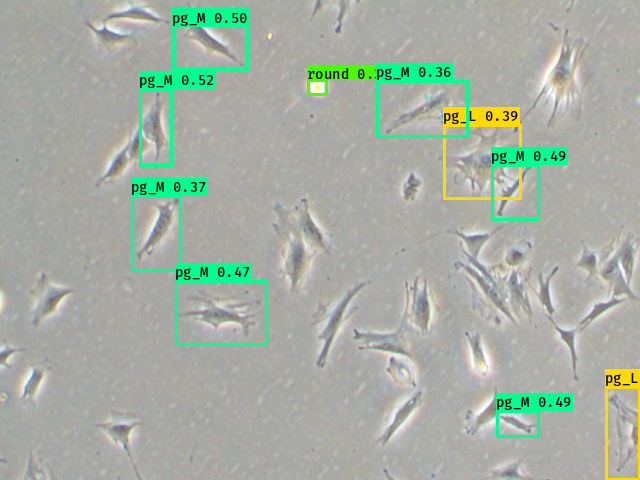

In [4]:
import os

do_object_detection('/home/ubuntu/cell/keras-yolo3/crop_to_4/JPEGImages/01_P2--0030.jpg', \
                    '/home/ubuntu/cell/keras-yolo3/crop_to_4/logs/000/trained_weights_final.h5', \
                    '/home/ubuntu/cell/keras-yolo3/crop_to_4/classes.txt')

# do_object_detection('/content/0945.jpg', 'logs/000/ep063-loss69.857-val_loss72.440.h5', 'dental_image_in_voc_format/classes.txt')

/home/ubuntu/cell/keras-yolo3/data/logs/000/trained_weights_final.h5 model, anchors, and classes loaded.
(1280, 960, 3)
Found 5 boxes for img
pg_L 0.33 (1157, 330) (1219, 483)
pg_L 0.36 (95, 472) (179, 594)
pg_M 0.31 (172, 805) (239, 863)
pg_M 0.32 (265, 835) (305, 919)
pg_M 0.39 (181, 284) (263, 348)
4.039724457077682


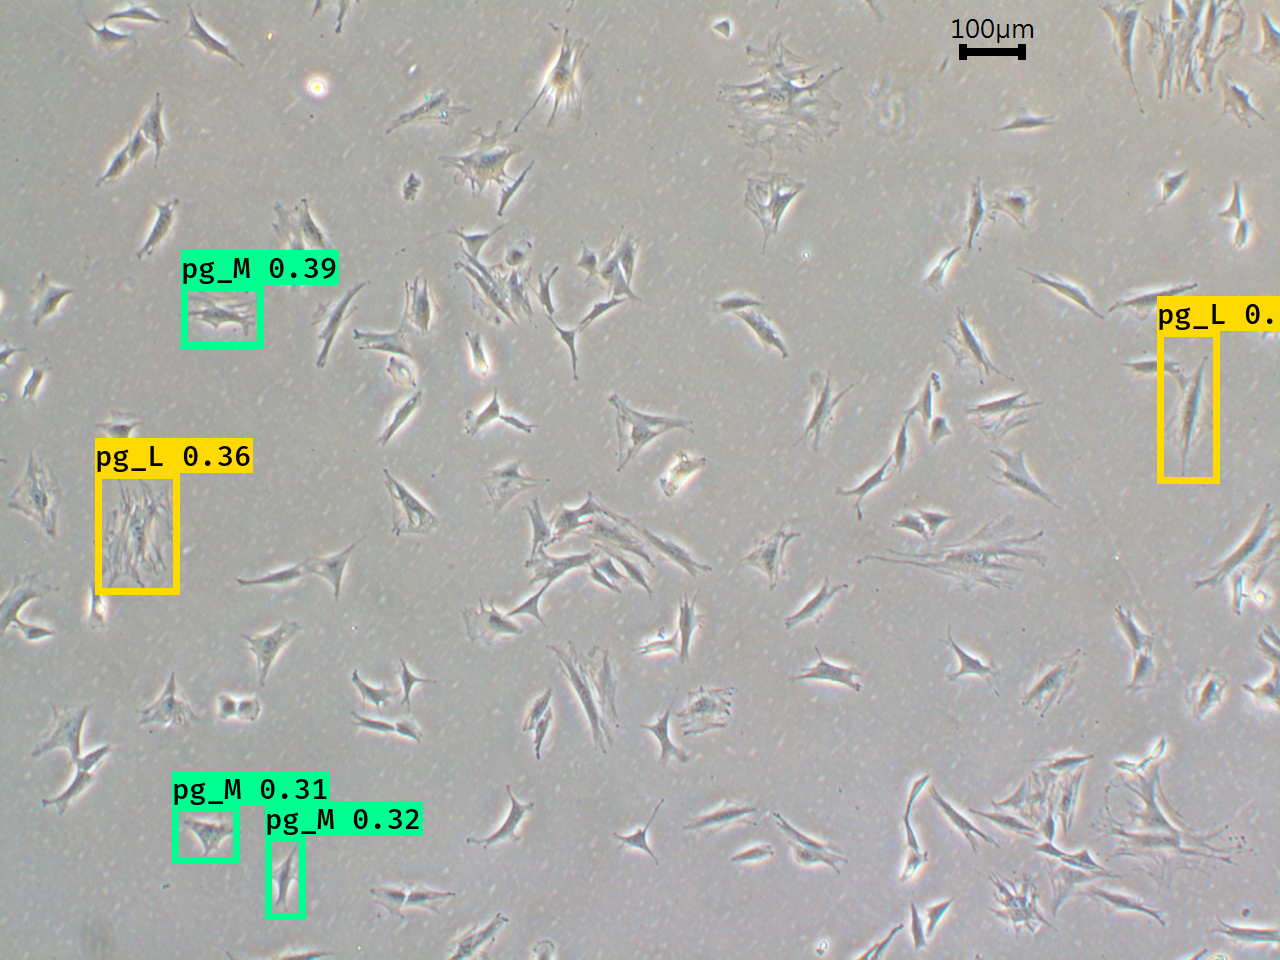

In [7]:
import os

do_object_detection('/home/ubuntu/cell/keras-yolo3/data_flip/JPEGImages/P2--0030.jpg', \
                    '/home/ubuntu/cell/keras-yolo3/data/logs/000/trained_weights_final.h5', \
                    '/home/ubuntu/cell/keras-yolo3/data_flip/classes.txt')

# do_object_detection('/content/0945.jpg', 'logs/000/ep063-loss69.857-val_loss72.440.h5', 'dental_image_in_voc_format/classes.txt')

/home/ubuntu/cell/keras-yolo3/crop_to_4/logs/000/trained_weights_final.h5 model, anchors, and classes loaded.
(1280, 960, 3)
Found 17 boxes for img
pg_L 0.30 (1095, 777) (1245, 890)
pg_L 0.38 (887, 505) (1048, 608)
pg_L 0.57 (95, 469) (186, 594)
pg_L 0.75 (717, 38) (844, 169)
pg_M 0.31 (1101, 273) (1213, 325)
pg_M 0.32 (519, 683) (559, 766)
pg_M 0.35 (957, 384) (1042, 437)
pg_M 0.35 (365, 871) (469, 925)
pg_M 0.36 (956, 176) (995, 252)
pg_M 0.37 (174, 286) (269, 342)
pg_M 0.38 (371, 77) (470, 142)
pg_M 0.42 (133, 189) (186, 270)
pg_M 0.43 (37, 755) (111, 819)
pg_M 0.43 (169, 803) (250, 866)
pg_M 0.45 (267, 839) (304, 916)
pg_M 0.50 (935, 627) (1008, 694)
pg_S 0.31 (397, 166) (424, 208)
149.1490817349404


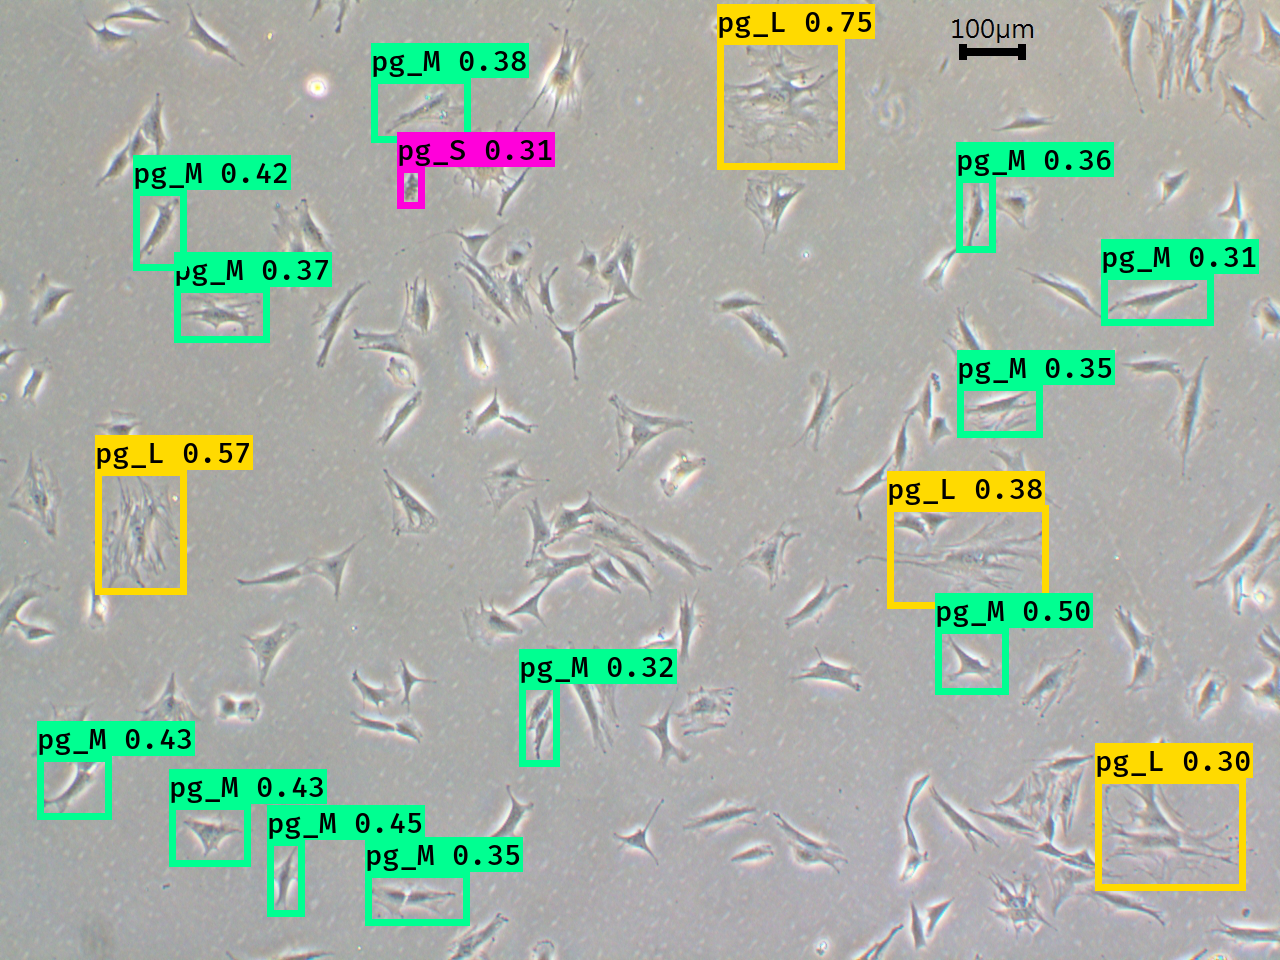

In [6]:
import os

do_object_detection('/home/ubuntu/cell/keras-yolo3/data_flip/JPEGImages/P2--0030.jpg', \
                    '/home/ubuntu/cell/keras-yolo3/crop_to_4/logs/000/trained_weights_final.h5', \
                    '/home/ubuntu/cell/keras-yolo3/crop_to_4/classes.txt')

# do_object_detection('/content/0945.jpg', 'logs/000/ep063-loss69.857-val_loss72.440.h5', 'dental_image_in_voc_format/classes.txt')

In [ ]:
import os

for root, dirs, files in os.walk("/home/ubuntu/cell/keras-yolo3/crop_to_4/test/"):
    for filename in files:
      print(filename)
      do_object_detection('/home/ubuntu/cell/keras-yolo3/crop_to_4/test/' + filename, \
                    '/home/ubuntu/cell/keras-yolo3/crop_to_4/logs/000/trained_weights_final.h5', \
                    '/home/ubuntu/cell/keras-yolo3/crop_to_4/classes.txt')


In [ ]:
import os

do_object_detection('/home/ubuntu/cell/keras-yolo3/data_flip/JPEGImages/P2--0030.jpg', \
                    '/home/ubuntu/cell/keras-yolo3/data_flip/logs/000/trained_weights_final.h5', \
                    '/home/ubuntu/cell/keras-yolo3/data_flip/classes.txt')

# do_object_detection('/content/0945.jpg', 'logs/000/ep063-loss69.857-val_loss72.440.h5', 'dental_image_in_voc_format/classes.txt')

In [ ]:
import os

do_object_detection('/home/ubuntu/cell/keras-yolo3/data_flip/JPEGImages/P2--0030.jpg', \
                    '/home/ubuntu/cell/keras-yolo3/data/logs/trained_weights_final_2020.h5', \
                    '/home/ubuntu/cell/keras-yolo3/data_flip/classes.txt')

# do_object_detection('/content/0945.jpg', 'logs/000/ep063-loss69.857-val_loss72.440.h5', 'dental_image_in_voc_format/classes.txt')

In [1]:
%cd /home/ubuntu/cell/keras-yolo3

/home/ubuntu/cell/keras-yolo3


In [ ]:
import os

for root, dirs, files in os.walk("/home/ubuntu/cell/keras-yolo3/crop_to_4/JPEGImages/"):
    for filename in files:
      print(filename)
      do_object_detection('/home/ubuntu/cell/keras-yolo3/crop_to_4/JPEGImages/' + filename, \
                    '/home/ubuntu/cell/keras-yolo3/crop_to_4/logs/000/trained_weights_final.h5', \
                    '/home/ubuntu/cell/keras-yolo3/crop_to_4/classes.txt')

# do_object_detection('/content/0945.jpg', 'logs/000/ep063-loss69.857-val_loss72.440.h5', 'dental_image_in_voc_format/classes.txt')
